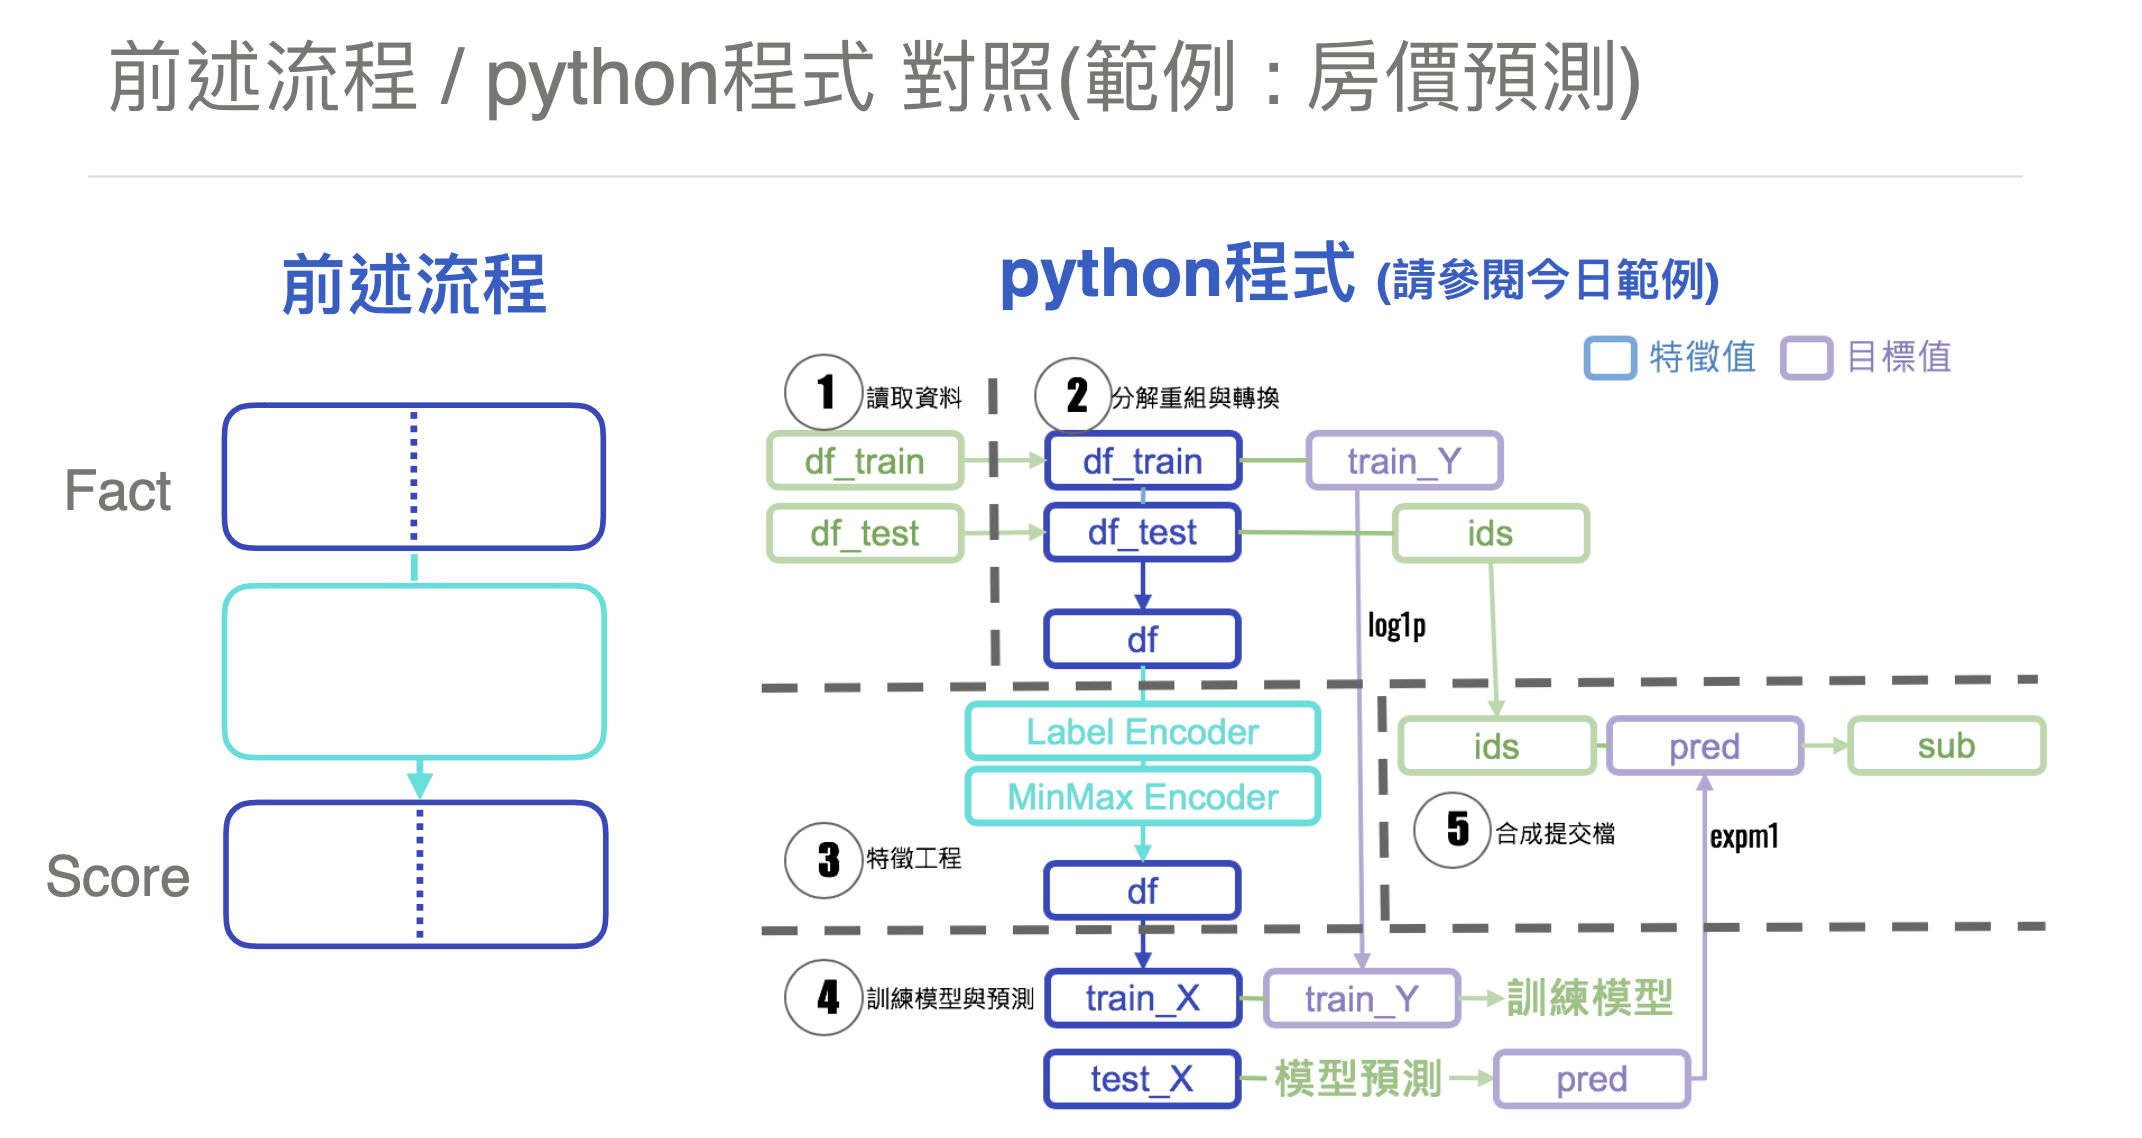

## 特徵工程簡介
    1. 讀取資料
    2. 分解重組與轉換
        * train+test=df
    3. 特徵工程  
        * Label Encoder
        * MinMax Encoder
    4. 訓練模型與預測
    5. 提交

### 1. 讀取資料

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#讀取訓練與測試資料
data_path = 'data/'
df_train = pd.read_csv('/Users/max/Downloads/house_train.csv')
df_test = pd.read_csv('/Users/max/Downloads/house_test.csv')


In [4]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


### 2. 分解重組與轉換

In [5]:
# 訓練資料需要 train_X, train_Y / 預測輸出需要 ids(識別每個預測值), test_X
# 在此先抽離出 train_Y 與 ids, 而先將 train_X, test_X 該有的資料合併成 df, 先作特徵工程
train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### 3. 特徵工程 

In [13]:
# 特徵工程-簡化版 : 全部空值先補-1, 所有類別欄位先做 LabelEncoder, 然後再與數字欄位做MinMaxScaler
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.8,0.210191,0.033420,1.0,0.0,1.0,1.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.8,0.257962,0.038795,1.0,0.0,1.0,1.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.8,0.219745,0.046507,1.0,0.0,0.0,1.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.8,0.194268,0.038561,1.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.8,0.270701,0.060576,1.0,0.0,0.0,1.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


### 4. 訓練模型與預測

In [14]:
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

# 使用線性迴歸模型
# train_X, train_Y 訓練模型, 並對 test_X 做出預測結果 pred
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
estimator.fit(train_X, train_Y)
pred = estimator.predict(test_X)

### 5. 提交

In [17]:
# 將輸出結果 pred 與前面留下的 ID(ids) 合併, 輸出成檔案
pred = np.expm1(pred)
sub = pd.DataFrame({'Id': ids, 'SalePrice': pred})
sub.to_csv('house_baseline.csv', index=False) 